In [11]:
import sys, os
sys.path.append('..')

import matplotlib.pyplot as plt
from src.drone_em_dl import *

data = data.Data()
data.load_data('../data/raw/falster_data_Kristian.csv')
data.get_features([11,12,13,22,23,24,25,26,27,28,29,30,31]) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14]  #[1,2,3,4,5,6,7,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
data.train_test_split(split=0.8)
data.norm_data()
model = tf.keras.models.load_model('../models/AE_falter_06_04_2023_15_1/best_model_AE_falter_06_04_2023_15_1.h5', custom_objects={'lr': get_lr_metric})



results = Reconstruction()
results.load_model(model)
results.get_reconstructions(data.norm_data.norm_test)
recionstructed_data = data.get_inv(results.reconstructions)
input_data  = data.get_inv(data.norm_data.norm_test)
latent_space = results.latent_space

2023-04-07 16:10:41.864406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-07 16:10:45.889796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [114]:
cluster = Cluster()
cluster.load_data(data.norm_data.zscore_test)


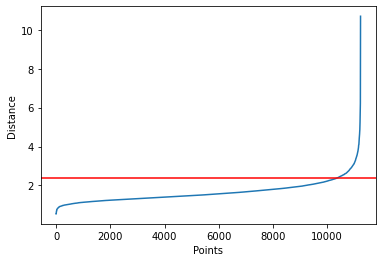

In [116]:
distances, indices = cluster.epsilon()
plt.plot(np.arange(len(distances)),distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.axhline(y=2.4, color='r', linestyle='-')
#distance should be around 0.25

In [122]:
max_clusters = []
epsi = []
for i in np.arange(2,5,0.05):
    cluster.dbscan(epsilon=i,min_sample=10)
    max_clusters.append(cluster.label.max())
    epsi.append(i)


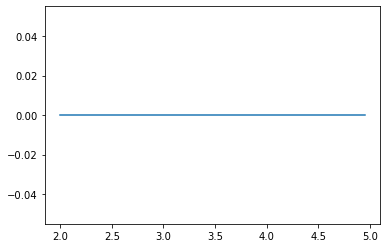

In [123]:
plt.plot(epsi,max_clusters)

[-1, 0]

In [111]:
cluster.dbscan(epsilon=0.115,min_sample=10)


In [124]:
cluster.tsne(dimensions=2,perplexity=0.000001)

/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11231 samples in 0.004s...
[t-SNE] Computed neighbors for 11231 samples in 2.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11231
[t-SNE] Computed conditional probabilities for sample 2000 / 11231
[t-SNE] Computed conditional probabilities for sample 3000 / 11231
[t-SNE] Computed conditional probabilities for sample 4000 / 11231
[t-SNE] Computed conditional probabilities for sample 5000 / 11231
[t-SNE] Computed conditional probabilities for sample 6000 / 11231
[t-SNE] Computed conditional probabilities for sample 7000 / 11231
[t-SNE] Computed conditional probabilities for sample 8000 / 11231
[t-SNE] Computed conditional probabilities for sample 9000 / 11231
[t-SNE] Computed conditional probabilities for sample 10000 / 11231
[t-SNE] Computed conditional probabilities for sample 11000 / 11231
[t-SNE] Computed conditional probabilities for sample 11231 / 11231
[t-SNE] Mean sigma: 0.794478
[t-SNE] KL divergence

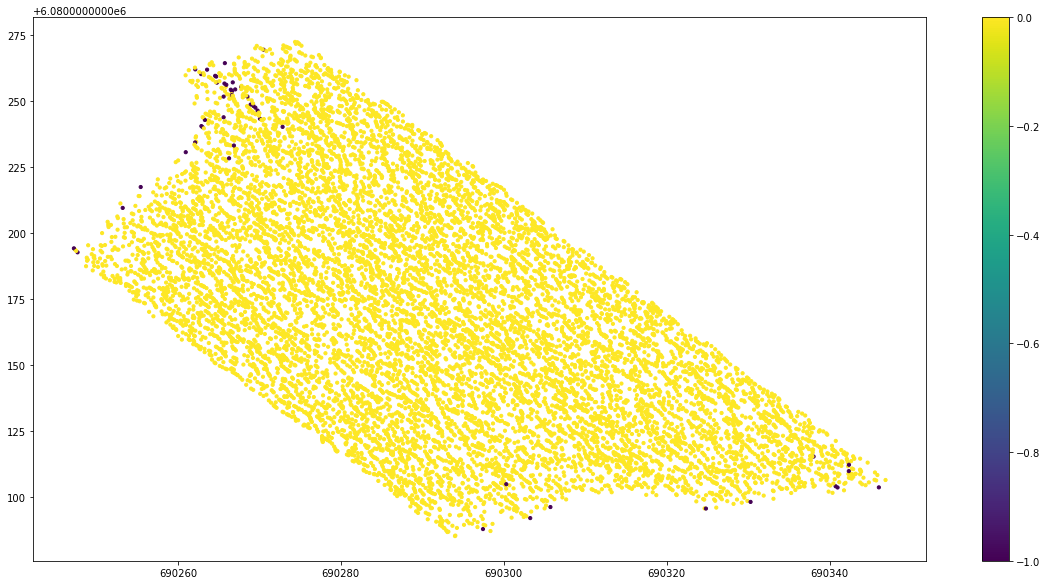

In [125]:
plt.figure(figsize=(20,10))
plt.scatter(data.org_test.X,data.org_test.Y,c=cluster.label,s=10)
plt.colorbar()

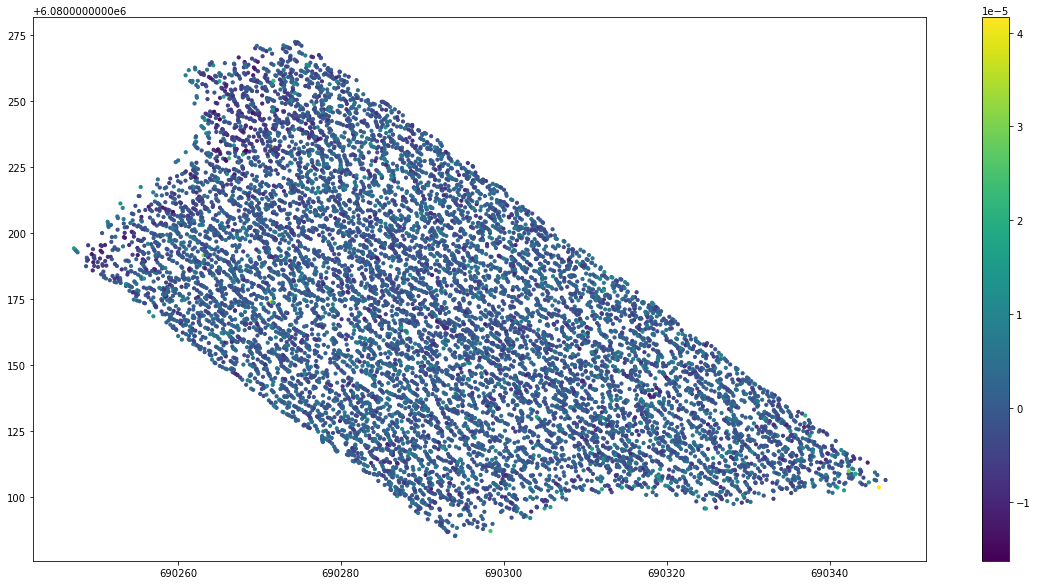

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(data.org_test.X,data.org_test.Y,c=latent_space[:,6],s=10)
plt.colorbar()

In [126]:
plot_cluters(cluster.tsne_clusters[:,:],cluster.label)

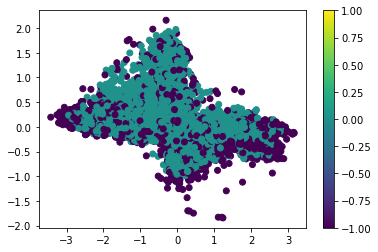

In [26]:
plt.scatter(x=cluster.tsne_clusters[:, 0], y=cluster.tsne_clusters[:, 1], c=cluster.label)
plt.colorbar()

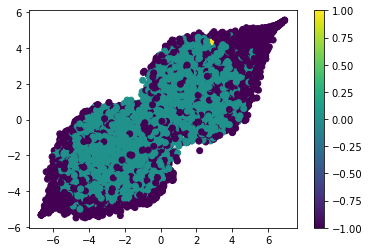

In [20]:
0.0001

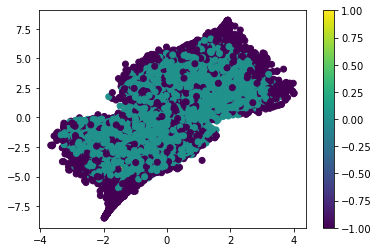

In [18]:
0.0001

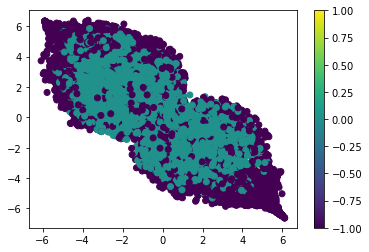

In [16]:
0.1